In [1]:
! pip3 install pandas

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
data = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [3]:
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
print("Number of entries: " + str(len(data)))
print("Number of features: " + str(len(data.columns)))

Number of entries: 101766
Number of features: 50


In [7]:
"""Check to see duplicate rows for a patient number"""
data[data['patient_nbr'] == 23043240]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
68,796152,23043240,Caucasian,Female,[50-60),?,2,1,4,2,...,No,Steady,No,No,No,No,No,No,Yes,<30
79,1070256,23043240,Caucasian,Female,[50-60),?,2,1,4,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
12923,52009764,23043240,Caucasian,Female,[50-60),?,2,1,4,4,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [8]:
"""Make copy of original data set"""
orig = data

In [9]:
"""Dedupe for patient encounters, selecting for encounter with maximum time_in_hospital"""
data = data.sort_values('time_in_hospital', ascending=False).drop_duplicates(subset=['patient_nbr'], keep='first')

In [10]:
"""Remove unnecessary features"""
data = data.drop(['encounter_id'], axis=1) # remove encounter ID, too unique and non-informative
data = data.drop(['weight', 'payer_code', 'medical_specialty', 'race'], axis=1) # these features have over 30% missing values
# optional: remove near zero variance features?
print(len(data.columns))

45


Observe the distribution of missing features

In [11]:
! pip3 install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [12]:
! pip3 install missingno

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [13]:
import seaborn as sns
import pandas as pd
import missingno as msno
# https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea

<AxesSubplot:>

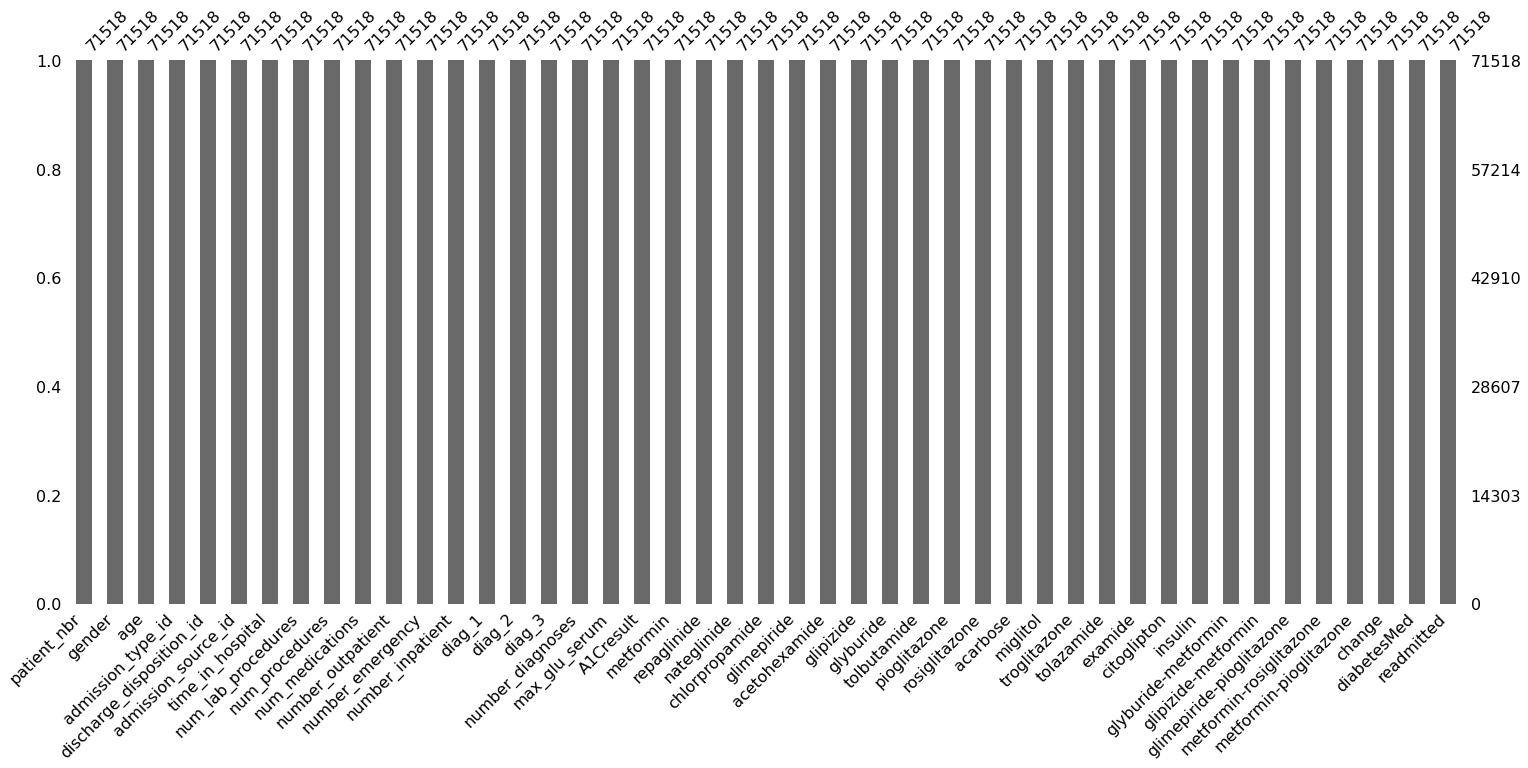

In [14]:
msno.bar(data)

In [15]:
data.replace('?', pd.NA)

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
28819,5481009,Male,[60-70),2,1,1,14,59,5,28,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
19368,72802098,Female,[80-90),1,3,7,14,67,0,19,...,No,Down,No,No,No,No,No,Ch,Yes,NO
74178,104625684,Male,[80-90),2,6,1,14,61,4,16,...,No,No,No,No,No,No,No,No,No,NO
38988,23507469,Female,[20-30),1,3,5,14,45,2,37,...,No,Down,No,No,No,No,No,Ch,Yes,NO
24998,43927515,Male,[80-90),6,22,17,14,68,0,23,...,No,Down,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,90625806,Male,[60-70),3,1,1,1,32,1,29,...,No,Up,No,No,No,No,No,Ch,Yes,>30
60165,67403385,Female,[50-60),1,1,7,1,25,0,8,...,No,Steady,No,No,No,No,No,No,Yes,>30
33520,49085757,Female,[50-60),1,1,1,1,48,1,8,...,No,No,No,No,No,No,No,No,Yes,NO
33510,18748791,Male,[60-70),2,1,1,1,47,5,5,...,No,No,No,No,No,No,No,No,No,NO


In [16]:
data.readmitted.unique()

array(['>30', 'NO', '<30'], dtype=object)

In [17]:
"""Define functions for feature transformations"""

# converts label to binary, considered readmitted if patient was readmitted within 30 days
def label_convert_to_binary(label):
    if label == '<30' or label == '>30':
        return 1
    else:
        return 0

# 700 levels, convert to 1 of 9 categories
def diag_convert(label):
    try:
        label = float(label)
    except: # to address error could not convert string to float: 'V57'
        return "Other"
    if label == 785 or (label >= 390 and label <= 459):
        return "Circulatory"
    elif label == 786 or (label >= 460 and label <= 519):
        return "Respiratory"
    elif label == 787 or (label >= 520 and label <= 579):
        return "Digestive"
    elif str(label).startswith('250.'):
        return "Diabetes"
    elif label >= 800 and label <= 999:
        return "Injury"
    elif label >= 710 and label <= 739:
        return "Musculoskeletal"
    elif label == 788 or (label >= 580 and label <= 629):
        return "Genitourinary"
    elif (label >= 1 and label <= 239) or label == 780 or label == 781 or label == 784 or (label >= 790 and label <= 799) or (label >= 240 and label <= 279 and label != 250) or (label >= 680 and label <= 709) or label == 782 or (label >= 290 and label <= 319):
        return "Neoplasms"
    else:
        return "Other"

# bin age, going from 10 levels to 3
def age_convert(label):
    young_level = {'[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'}
    mid_level = {'[50-60)', '[60-70)', '[70-80)'}
    old_level = {'[80-90)', '[90-100)'}
    if label in young_level:
        return 1
    elif label in mid_level:
        return 1.5
    elif label in old_level:
        return 2

# change from 8 levels to 2
# k = known, u = unknown
def admission_type_convert(label):
    known_level = {1,2,3,4,7}
    if label in known_level:
        return 'k'
    else:
        return 'u'

# go from 8 levels to 5
# r = referral, t = transfer, u = unknown, b = birth, o = other
def admission_source_convert(label):
    referral_level = {1,2,3}
    transfer_level = {4,5,6,10,18,22,25,26}
    unknown_level = {20,17,9}
    birth_level = {13,14,11}
    other_level = {8,7}
    if label in referral_level:
        return 'r'
    elif label in transfer_level:
        return 't'
    elif label in unknown_level:
        return 'u'
    elif label in birth_level:
        return 'b'
    elif label in other_level:
        return 'o'

# go from 25 levels to 6
# d = discharge, h = hospice, e = expired, u = unknown, o = other
def disposition_convert(label):
    discharge_level = {1,2,3,4,5,6,8,10,15,16,17,22,23,24,30,27,28,29}
    hospice_level = {13,14}
    expired_level = {11,19,20,21}
    unknown_level = {18,25,26}
    other_level = {7,9,12}
    if label in discharge_level:
        return 'd'
    elif label in hospice_level:
        return 'h'
    elif label in unknown_level:
        return 'u'
    elif label in expired_level:
        return 'e'
    elif label in other_level:
        return 'o'

In [18]:
"""Perform transformations now"""
data['label'] = data['readmitted'].apply(label_convert_to_binary) # convert readmitted to binary classification label
data['age'] = data['age'].apply(age_convert) # convert age to numeric bins: 1, 1.5, 2
data['diag_1'] = data['diag_1'].apply(diag_convert)
data['diag_2'] = data['diag_2'].apply(diag_convert)
data['diag_3'] = data['diag_3'].apply(diag_convert)
data['admission_source_id'] = data['admission_source_id'].apply(admission_source_convert)
data['admission_type_id'] = data['admission_type_id'].apply(admission_type_convert)
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(disposition_convert)
data = data.drop(['readmitted'], axis=1) # we have the updated binary label, no need for duplicate label column

In [19]:
"""Drop rows where discharge disposition id is expired, as that doesn't help with readmission"""
indexNames = data[data['discharge_disposition_id'] == 'e'].index
data.drop(indexNames, inplace=True)

In [20]:
patient_data_orig = orig[orig['patient_nbr'] == 5481009]
patient_data_orig[['patient_nbr', 'age', 'time_in_hospital', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']]

,patient_nbr,age,time_in_hospital,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3
28448,5481009,[60-70),7,1,1,6,250.6,682,682
28819,5481009,[60-70),14,2,1,1,250.8,707,682
33795,5481009,[60-70),4,2,3,1,724,250,401


In [21]:
# to validate transformations made
patient_data = data[data['patient_nbr'] == 5481009]
patient_data[['patient_nbr', 'age', 'time_in_hospital', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'label']]

,patient_nbr,age,time_in_hospital,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,label
28819,5481009,1.5,14,k,d,r,Diabetes,Neoplasms,Neoplasms,1


In [22]:
"""Remove patient nbr, was used for debugging purposes but now unnecessary"""
data = data.drop(['patient_nbr'], axis=1)

In [23]:
"""Drop gender == unknown, as that seems to show a massive error bar"""
indexNames = data[data['gender'] == 'Unknown/Invalid'].index
data.drop(indexNames, inplace=True)

In [24]:
"""Handle missing values...again"""
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70213 entries, 28819 to 0
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    70213 non-null  object 
 1   age                       70213 non-null  float64
 2   admission_type_id         70213 non-null  object 
 3   discharge_disposition_id  70213 non-null  object 
 4   admission_source_id       70213 non-null  object 
 5   time_in_hospital          70213 non-null  int64  
 6   num_lab_procedures        70213 non-null  int64  
 7   num_procedures            70213 non-null  int64  
 8   num_medications           70213 non-null  int64  
 9   number_outpatient         70213 non-null  int64  
 10  number_emergency          70213 non-null  int64  
 11  number_inpatient          70213 non-null  int64  
 12  diag_1                    70213 non-null  object 
 13  diag_2                    70213 non-null  object 
 14  diag_3

Create cohorts based on age

In [25]:
data.age.values

array([1.5, 2. , 2. , ..., 1.5, 1.5, 1. ])

In [26]:
young_cohort = data[data['age'] == 1]
mid_cohort = data[data['age'] == 1.5]
old_cohort = data[data['age'] == 2]

In [27]:
print(len(young_cohort))
print(len(mid_cohort))
print(len(old_cohort))

11227
45783
13203


In [28]:
""" Drug list:
metformin
repaglinicde
acetohexamide
glipizide
glyburide
tolbutamide
chlorpropamide
"""

' Drug list:\nmetformin\nrepaglinicde\nacetohexamide\nglipizide\nglyburide\ntolbutamide\nchlorpropamide\n'

Types of drugs: sulfonylurea 1 and 2
Generation 1: chlorpropamide, acetohexamide, tolbutamide, tolazamide. These are not prescribed as much. 

In [29]:
print("Glimepiride: " + str(len(data[data['glimepiride'] == 'Steady']))) # 3308
print(len(data[data['metformin'] == 'Steady'])) # 13522
print(len(data[data['repaglinide'] == 'Steady'])) # 849
print(len(data[data['nateglinide'] == 'Steady'])) # 472
print(len(data[data['chlorpropamide'] == 'Steady'])) # 60 not many people take this, more "risky" because of longer half-life?
print(len(data[data['acetohexamide'] == 'Steady'])) # 1
print(len(data[data['glipizide'] == 'Steady'])) # 8017
print(len(data[data['repaglinide'] == 'Steady'])) # 849
print("Tolbutamide: " + str(len(data[data['tolbutamide'] == 'Steady']))) # 18
print(len(data[data['tolazamide'] == 'Steady'])) # 30
print(len(data[data['glyburide'] == 'Steady'])) # 6650
print(len(data[data['insulin'] == 'Steady'])) # 21750
print(len(data[data['pioglitazone'] == 'Steady']))
print(len(data[data['rosiglitazone'] == 'Steady']))
print(len(data[data['troglitazone'] == 'Steady']))
print(len(data[data['acarbose'] == 'Steady']))
print(len(data[data['miglitol'] == 'Steady']))

Glimepiride: 3308
13522
849
472
60
1
8017
849
Tolbutamide: 18
30
6650
21750
4993
4333
3
180
16


In [30]:
# analyze gen 1 drugs
gen1_cohort = data[(data['chlorpropamide'] == 'Steady') | (data['acetohexamide'] == 'Steady') 
    | (data['tolazamide'] == 'Steady') | (data['tolbutamide'] == 'Steady')]
print(len(gen1_cohort))

109


In [31]:
# analyze gen 2 drugs
gen2_cohort = data[(data['glipizide'] == 'Steady') | (data['glyburide'] == 'Steady') 
    | (data['glimepiride'] == 'Steady')]
print(len(gen2_cohort))

17745


In [32]:
gen1_cohort

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label
26086,Female,1.5,k,d,o,14,68,4,34,0,...,No,Steady,No,No,No,No,No,Ch,Yes,1
79027,Male,2.0,k,d,r,14,43,2,23,1,...,No,Up,No,No,No,No,No,Ch,Yes,1
62149,Female,2.0,k,d,r,13,43,6,39,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
2740,Female,2.0,k,d,r,13,35,1,18,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
40768,Male,2.0,u,d,u,11,77,1,17,0,...,No,Steady,No,No,No,No,No,Ch,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47659,Male,1.0,k,d,o,1,46,1,13,0,...,No,No,No,No,No,No,No,No,Yes,0
47074,Female,2.0,k,d,r,1,9,3,7,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
25744,Male,1.5,u,d,u,1,19,0,8,0,...,No,No,No,No,No,No,No,Ch,Yes,0
27551,Male,2.0,u,d,o,1,41,0,19,0,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [33]:
# consider imbalance in the data
print(len(data[data['label'] == 0]))
print(len(data[data['label'] == 1]))

46621
23592


One hot encoding categorical features

In [34]:
# prints out just the categorical variables
cat_data = data.select_dtypes(include = 'object')
categorical_columns = cat_data.columns
categorical_columns

Index(['gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [35]:
cat_data # one-hot encoding

,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
28819,Male,k,d,r,Diabetes,Neoplasms,Neoplasms,None,Norm,No,...,No,No,Steady,No,No,No,No,No,Ch,Yes
19368,Female,k,d,o,Circulatory,Diabetes,Genitourinary,None,None,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
74178,Male,k,d,r,Other,Circulatory,Circulatory,None,None,No,...,No,No,No,No,No,No,No,No,No,No
38988,Female,k,d,t,Diabetes,Neoplasms,Other,None,None,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
24998,Male,u,d,u,Circulatory,Respiratory,Genitourinary,None,None,Steady,...,No,No,Down,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,Male,k,d,r,Musculoskeletal,Diabetes,Neoplasms,None,None,Down,...,No,No,Up,No,No,No,No,No,Ch,Yes
60165,Female,k,d,o,Respiratory,Circulatory,Diabetes,None,None,No,...,No,No,Steady,No,No,No,No,No,No,Yes
33520,Female,k,d,r,Diabetes,Neoplasms,Neoplasms,None,None,No,...,No,No,No,No,No,No,No,No,No,Yes
33510,Male,k,d,r,Circulatory,Neoplasms,Diabetes,None,None,No,...,No,No,No,No,No,No,No,No,No,No


In [36]:
# unique values in each columns
for x in cat_data.columns:
    #prinfting unique values
    print(x ,':', len(cat_data[x].unique()))

# notice how examide has only 1 value

gender : 2
admission_type_id : 2
discharge_disposition_id : 4
admission_source_id : 5
diag_1 : 9
diag_2 : 9
diag_3 : 9
max_glu_serum : 4
A1Cresult : 4
metformin : 4
repaglinide : 4
nateglinide : 4
chlorpropamide : 4
glimepiride : 4
acetohexamide : 2
glipizide : 4
glyburide : 4
tolbutamide : 2
pioglitazone : 4
rosiglitazone : 4
acarbose : 3
miglitol : 4
troglitazone : 2
tolazamide : 2
examide : 1
citoglipton : 1
insulin : 4
glyburide-metformin : 4
glipizide-metformin : 2
glimepiride-pioglitazone : 1
metformin-rosiglitazone : 2
metformin-pioglitazone : 2
change : 2
diabetesMed : 2


In [37]:
# importing numpy
import numpy as np
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

enc = OneHotEncoder(handle_unknown='error')
enc.fit(cat_data)

OneHotEncoder()

In [38]:
enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['k', 'u'], dtype=object),
 array(['d', 'h', 'o', 'u'], dtype=object),
 array(['b', 'o', 'r', 't', 'u'], dtype=object),
 array(['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury',
        'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory'],
       dtype=object),
 array(['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury',
        'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory'],
       dtype=object),
 array(['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury',
        'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory'],
       dtype=object),
 array(['>200', '>300', 'None', 'Norm'], dtype=object),
 array(['>7', '>8', 'None', 'Norm'], dtype=object),
 array(['Down', 'No', 'Steady', 'Up'], dtype=object),
 array(['Down', 'No', 'Steady', 'Up'], dtype=object),
 array(['Down', 'No', 'Steady', 'Up'], dtype=object),
 array(['Down', 'No', 'Steady', 'Up'], dtype=object),
 array(['Down', 'No',

In [39]:
cat_data.nunique() # none are binary

gender                      2
admission_type_id           2
discharge_disposition_id    4
admission_source_id         5
diag_1                      9
diag_2                      9
diag_3                      9
max_glu_serum               4
A1Cresult                   4
metformin                   4
repaglinide                 4
nateglinide                 4
chlorpropamide              4
glimepiride                 4
acetohexamide               2
glipizide                   4
glyburide                   4
tolbutamide                 2
pioglitazone                4
rosiglitazone               4
acarbose                    3
miglitol                    4
troglitazone                2
tolazamide                  2
examide                     1
citoglipton                 1
insulin                     4
glyburide-metformin         4
glipizide-metformin         2
glimepiride-pioglitazone    1
metformin-rosiglitazone     2
metformin-pioglitazone      2
change                      2
diabetesMe

In [40]:
# https://stackoverflow.com/questions/55229301/one-hot-encoding-multiple-columns-in-sklearn-and-naming-columns 
ohe_data = pd.get_dummies(data, columns = categorical_columns)
ohe_data

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,label,...,glipizide-metformin_Steady,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
28819,1.5,14,59,5,28,0,0,1,5,1,...,0,1,1,0,1,0,1,0,0,1
19368,2.0,14,67,0,19,0,0,0,9,0,...,0,1,1,0,1,0,1,0,0,1
74178,2.0,14,61,4,16,0,0,1,9,0,...,0,1,1,0,1,0,0,1,1,0
38988,1.0,14,45,2,37,0,1,1,9,0,...,0,1,1,0,1,0,1,0,0,1
24998,2.0,14,68,0,23,0,0,1,9,1,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,1.5,1,32,1,29,0,0,0,9,1,...,0,1,1,0,1,0,1,0,0,1
60165,1.5,1,25,0,8,0,0,0,7,1,...,0,1,1,0,1,0,0,1,0,1
33520,1.5,1,48,1,8,0,0,0,9,0,...,0,1,1,0,1,0,0,1,0,1
33510,1.5,1,47,5,5,0,0,0,5,0,...,0,1,1,0,1,0,0,1,1,0


In [41]:
data = ohe_data

/var/folders/xp/yp2gh__s5j188pt1jsvz_1_r0000gr/T/ipykernel_52320/1212378970.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ohe_data.age)


<AxesSubplot:xlabel='age', ylabel='Density'>

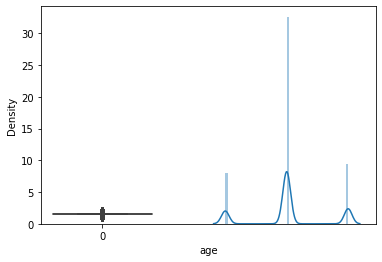

In [42]:
import seaborn as sns
# Box plot
sns.boxplot(ohe_data.age)

# Distribution plot
#
sns.distplot(ohe_data.age)

In [43]:
"""Convert the dataframe to numpy"""
np_data = data.to_numpy()
np_data.shape

(70213, 130)

In [44]:
# isolate just the feature set
np_features = np_data[:, :-1]
# label column
np_label = np_data[:, -1]
np_label

array([1., 1., 0., ..., 1., 0., 0.])

Let's try clustering with DBSCAN. To do that, we need to reduce dimensionality to 2 components with PCA.

In [55]:
"""Let's try PCA"""
# first, you need to standardize data
# https://stackoverflow.com/questions/4544292/how-do-i-standardize-a-matrix
# only look at features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(np_features)
pca = PCA(n_components=2)
transformed_values = pca.fit_transform(standardized_data)

In [56]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(transformed_values)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(transformed_values)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

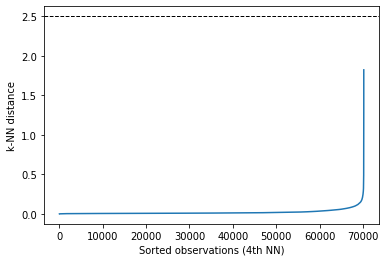

In [57]:
import matplotlib.pyplot as plt
# use this plot to find the best eps
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [58]:
"""Let's try DBSCAN"""
# first standardize data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter
clusters = DBSCAN(eps=0.25, min_samples=4, metric = 'euclidean').fit(transformed_values)
c = Counter(clusters.labels_)
num_clusters = len(c)
num_clusters

6

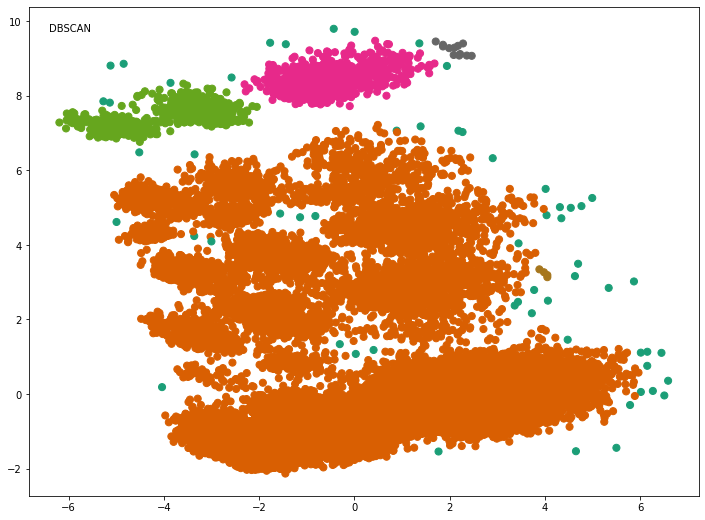

In [60]:
y_pred = clusters.fit_predict(transformed_values)
plt.figure(figsize=(12,9))
plt.annotate('DBSCAN', xy=(0.03, 0.95), xycoords='axes fraction')
plt.scatter(transformed_values[:, 0], transformed_values[:, 1], c=y_pred, s=50, cmap='Dark2')
# green points are the outliers

InterpretML

In [93]:
! pip3 install interpret

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [94]:
import interpret

In [95]:
import sklearn

In [105]:
# TODO: change the data here
from sklearn.model_selection import train_test_split
data = gen1_cohort
train_cols = data.columns[0:-1]
label = data.columns[-1]
X = data[train_cols]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

# or substitute with LogisticRegression, DecisionTreeClassifier, RuleListClassifier, ...
# EBM supports pandas dataframes, numpy arrays, and handles "string" data natively.

ExplainableBoostingClassifier(feature_names=['gender', 'age',
                                             'admission_type_id',
                                             'discharge_disposition_id',
                                             'admission_source_id',
                                             'time_in_hospital',
                                             'num_lab_procedures',
                                             'num_procedures',
                                             'num_medications',
                                             'number_outpatient',
                                             'number_emergency',
                                             'number_inpatient', 'diag_1',
                                             'diag_2', 'diag_3',
                                             'number_diagnoses',
                                             'max_glu_serum', 'A1Cresult',
                                             'metformin', 'r...
                                             'categorical', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'categorical', 'categorical',
                                             'categorical', 'continuous',
                                             'categorical', 'categorical',
                                             'categorical', 'categorical',
                                             'categorical', 'categorical',
                                             'categorical', 'categorical',
                                             'categorical', 'categorical',
                                             'categorical', 'categorical',
                                             'categorical', 'categorical', ...])

In [107]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

<!-- http://127.0.0.1:7001/5257157056/ -->

In [98]:
from interpret import show
from interpret.data import Marginal

marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
show(marginal)

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



<!-- http://127.0.0.1:7001/4634306176/ -->

In [108]:
from interpret import show
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/5266072928/ -->

In [103]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

<!-- http://127.0.0.1:7001/5215965472/ -->

In [58]:
data.number_inpatient.unique()

array([ 1,  0,  4,  2,  5,  3,  6,  7, 15, 14,  8,  9, 10, 11, 12, 19, 18])

In [109]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7001/5269936672/ -->

In [ ]:
# https://github.com/interpretml/interpret/blob/develop/examples/python/notebooks/Interpretable%20Classification%20Methods.ipynb